Projekt, dotyczy klasyfikacji win ze względu na jakość (kolumna quality). Część zbioru będzie służyła do nauczania klasyfikatorów, a pozostała do testowania ich umiejętności.
Części projektu: 
1. analiza zbioru w taki sam sposób jak na laboratoriach: policzenie klas i atrybutów, sprawdzenie i odrzucenie pustych rekordów itp. 
2. Obliczenie odchylenia standardowego, wartości maksymalnej i minimalnej i innych popularnych miar tylko dla atrybutów numerycznych + omówienie. 
3. Sprawdzenie czy ma miejsce korelacja wśród danych.
Jeśli wartość bezwzględna (moduł) z korelacji między dwoma atrybutami jest większy niż 0,9 to  z dalszej analizy (z tych dwóch atrybutów) odrzucamy ten atrybut, którego suma modułów wszystkich korelacji jest większa.
4. Podział zbioru danych(który jest macierzą liczb) na zbiór uczący i testowy - proponuję tę funkcję: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Podział na części uczącą i testową np. w proporcji 90% (dla uczącego) do 10% (dla testowego). Dodam, że używa się też proporcji 70 do 30. Z zachowaniem liczebności klas zbioru wejściowego - chodzi tutaj o poprawne wywołanie wspomnianej funkcji train_test_split!
Stworzone w ten sposób zbiory: uczący i testowy warto zapisać (jako osobne pliki). Wtedy nie trzeba będzie znów losować zbiorów itp.
5. Uczenie i testowanie zadanych klasyfikatorów. Doczytanie o ich danych wejściowych i o tym jak działają. Proszę przetestować różne warianty parametrów wejściowych klasyfikatorów.
 
Dla Panów zespołu będą to klasyfikatory:
- Drzewo decyzyjne
- AdaBoost (np. ten: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html )
Żeby porównać dwa klasyfikatory, uczymy je zawsze na tym samym zbiorze uczącym i zawsze testujemy na tym samym testowym.
Przy porównywaniu jakości klasyfikacji warto zastosować narzędzia/miary poznane podczas zajęć, m.in proszę o wyliczanie dokładności (ang. accuracy) dla każdego klasyfikatora (tj. konkretnego testu na danym klasyfikatorze).
6. Opis wyników + wnioski
7. Cały projekt proszę zapisać w jednym pliku Jupyter Notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytanie zbioru

In [2]:
df = pd.read_csv('WineQT.csv')

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

## Analiza zbioru

Liczba obiektów:  1143
Liczba klas:  6
Obiektów w klasie  5 :  483
Obiektów w klasie  6 :  462
Obiektów w klasie  7 :  143
Obiektów w klasie  4 :  33
Obiektów w klasie  8 :  16
Obiektów w klasie  3 :  6
Liczba atrybutów:  13
Ilość braków:  0


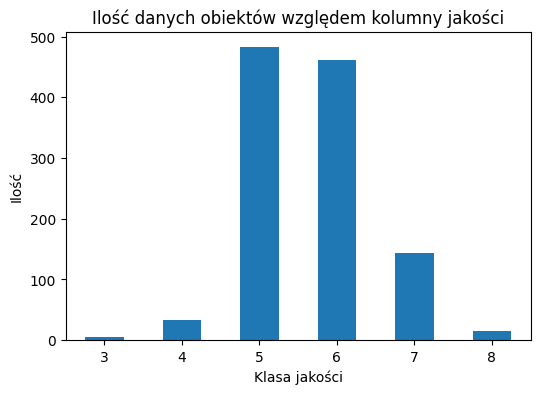

In [3]:
# liczba obiektów
print("Liczba obiektów: ", df.shape[0])
# liczba klas
klasy = df['quality'].unique()
print("Liczba klas: ", klasy.shape[0])
# liczba obiektów
for i in list(klasy):
    print("Obiektów w klasie ", i, ": ", len(df[df['quality'] == i]))
# liczba atrybutów
print("Liczba atrybutów: ", df.shape[1])
# liczba braków
print("Ilość braków: ", df.isnull().sum().sum())

# wykres
plt.figure(figsize=(6, 4))
df['quality'].value_counts().sort_index().plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem kolumny jakości', fontsize=12)
plt.xlabel('Klasa jakości', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 6 klas jakości (3, 4, 5, 6, 7, 8) oraz nie posiada braków. Większość obiektów mieści się w klasach 5, 6, 7. Jednocześnie ma 13 atrybutów, z czego jeden to ID, który jest zbędny

In [4]:
df = df.drop(columns = 'Id')

Wykresy

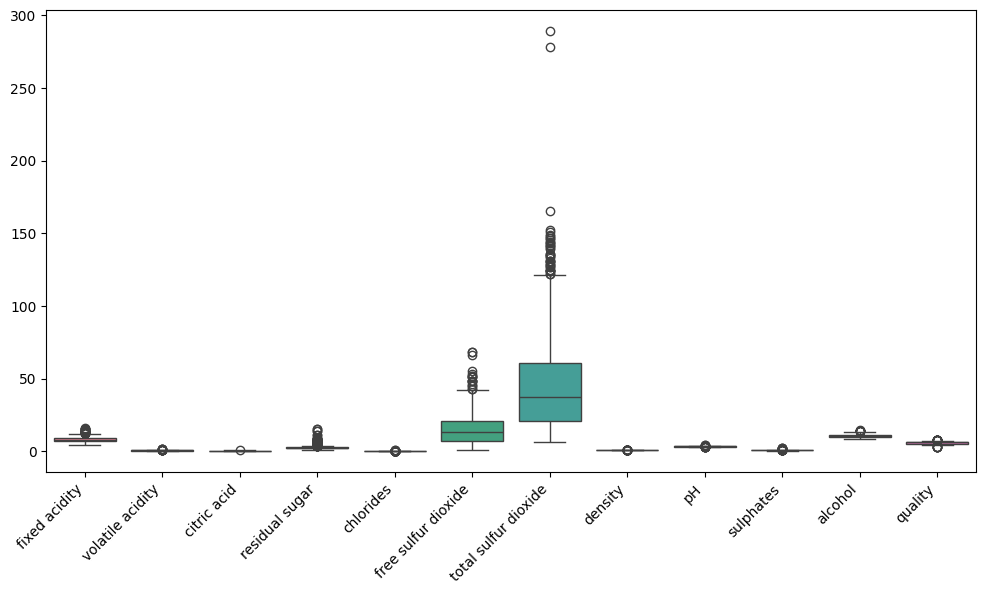

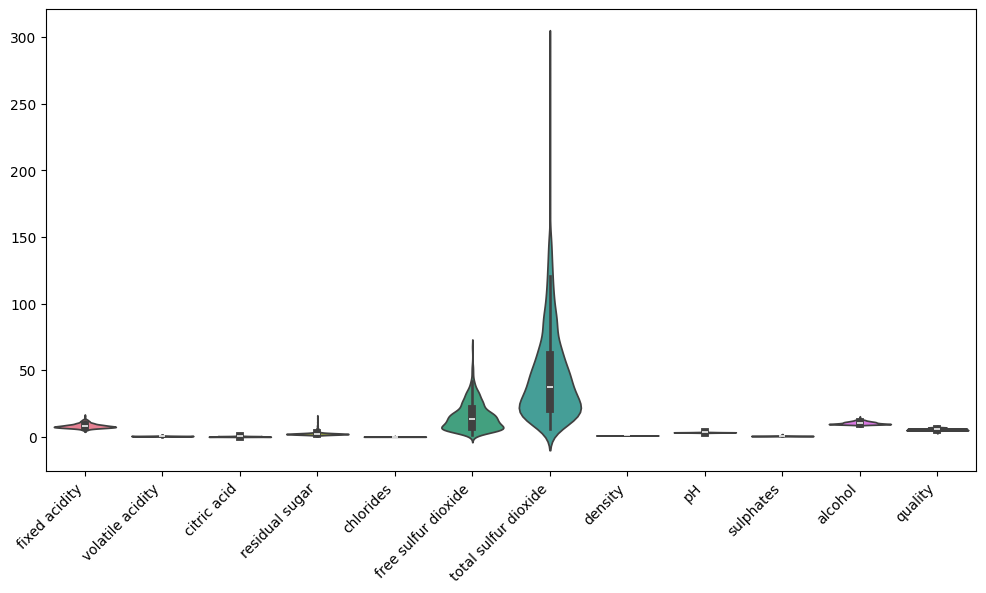

In [5]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.boxplot(data = df)
plt.show()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.violinplot(data = df)
plt.show()

Z wykresu wynika, że kolumny free sulfur dioxide i total sulfur dioxide posiadają kilka obiektów o wartościach podejrzanie niepasujących do reszty. Prawdopodobnie są to błędy.

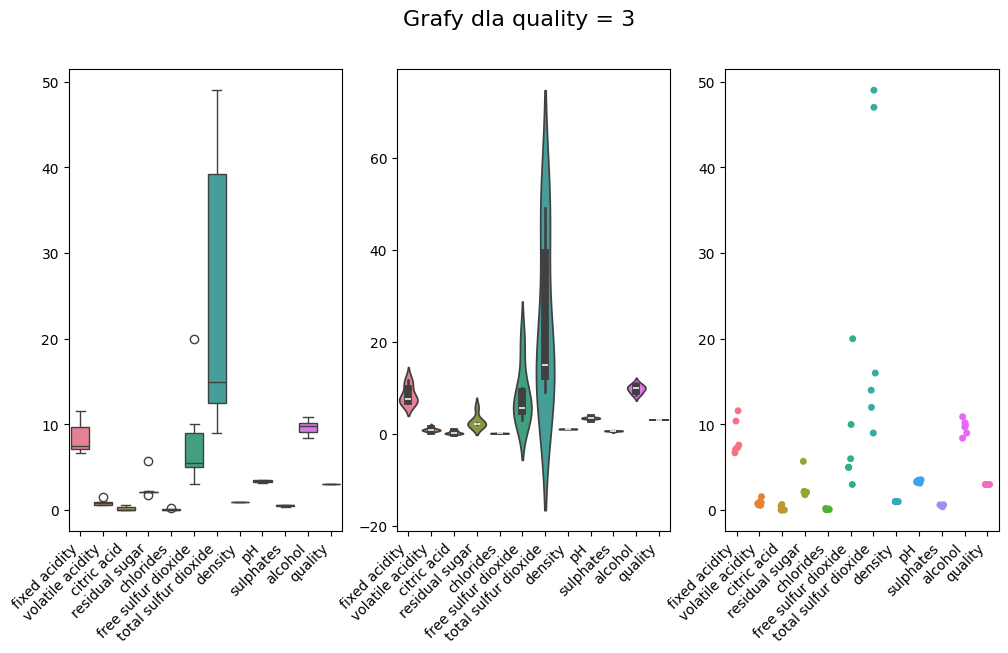

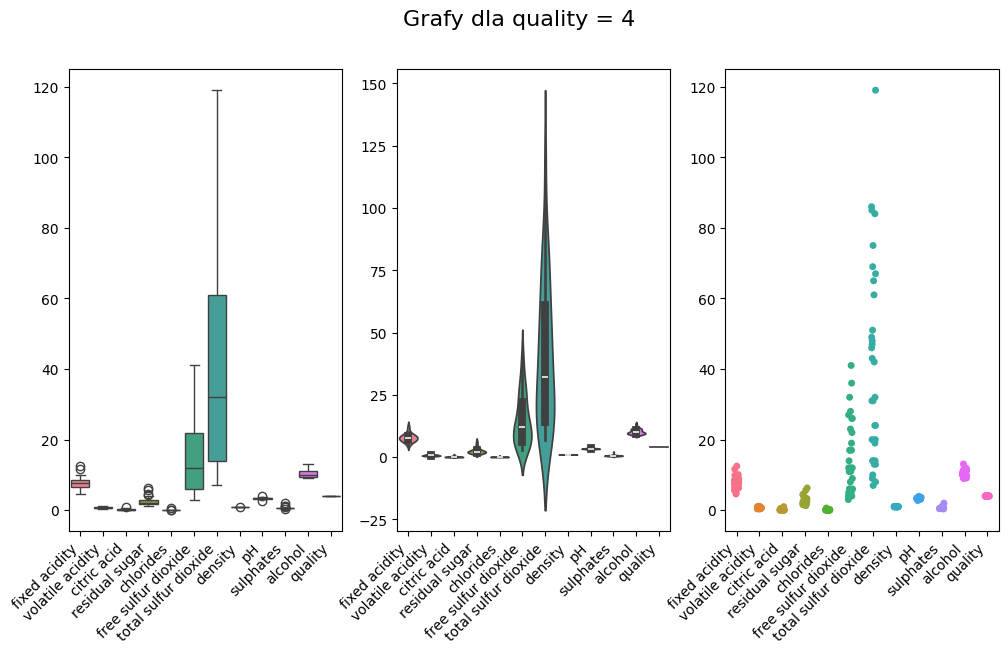

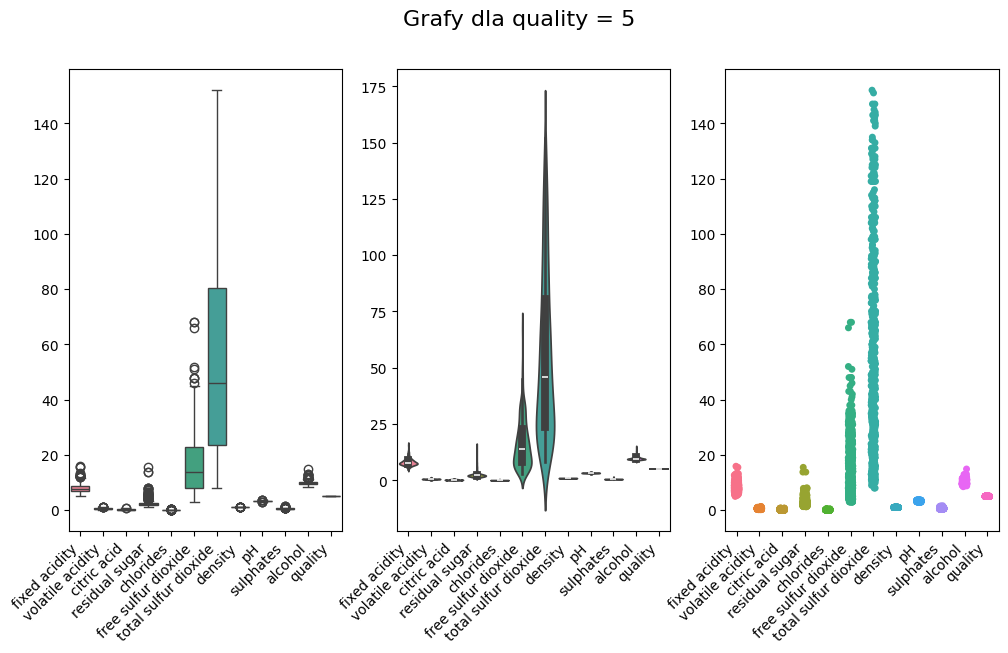

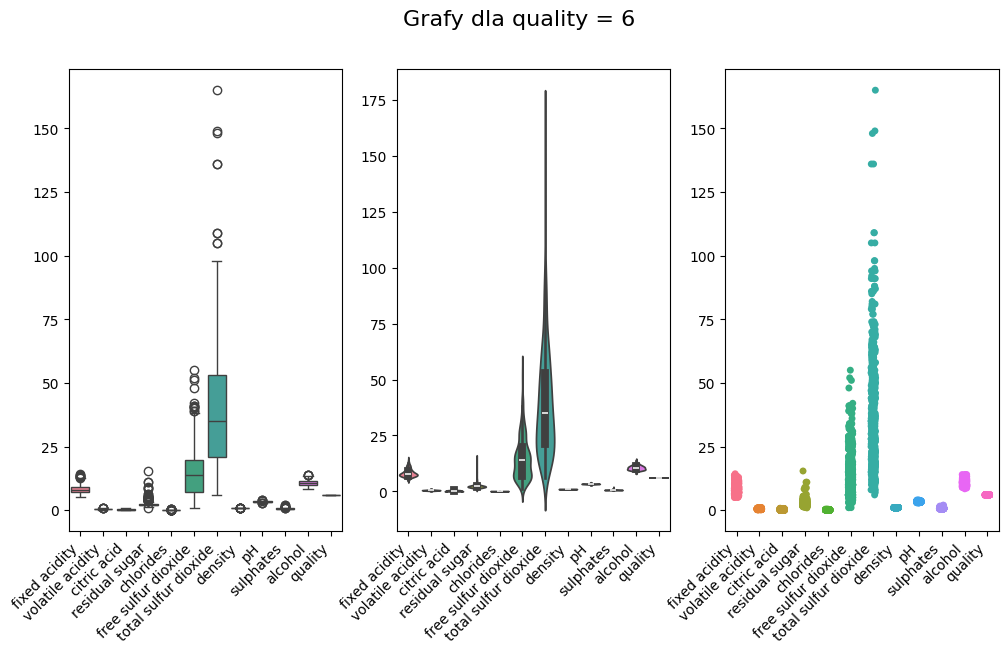

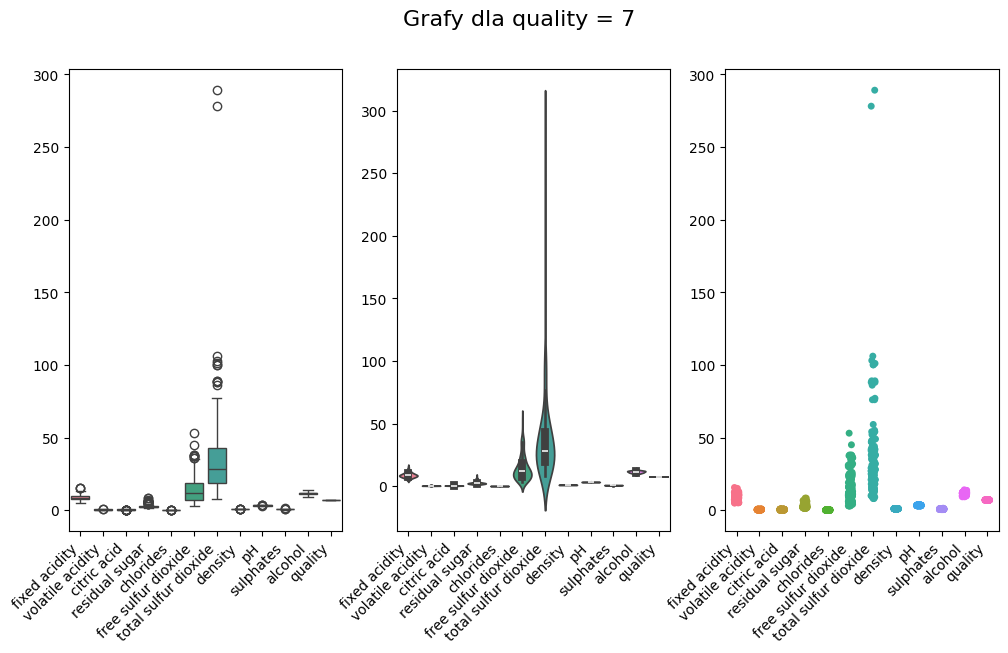

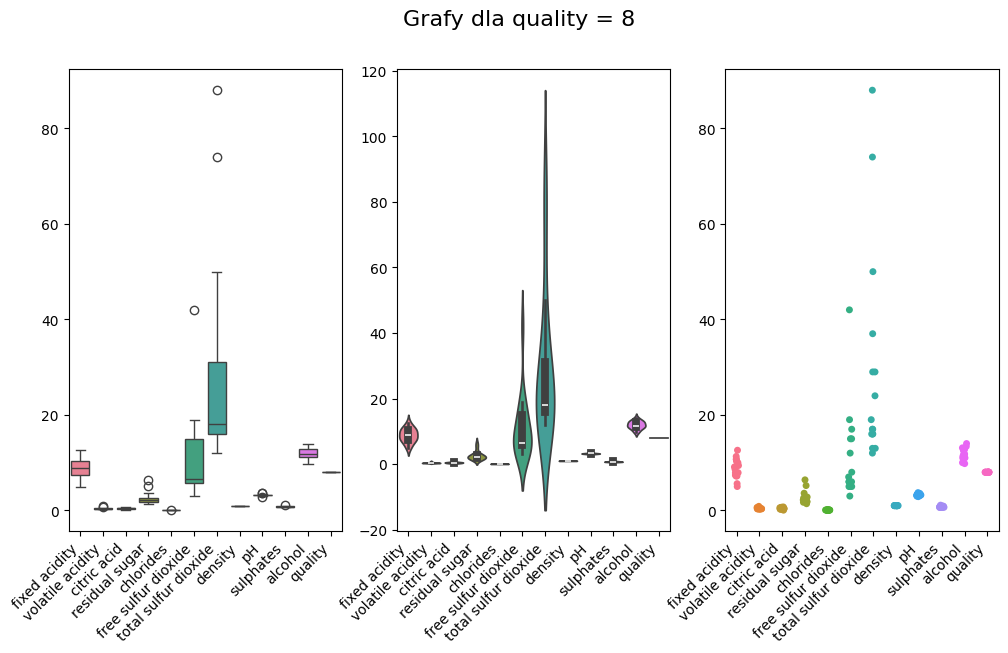

In [26]:
for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Po przeanalizowaniu wykresów atrybutów dla każdego quality osobno można wywnioskować, że wina jakości 3, 4, 6, 7, 8 posiadają obiekty o zbyt wysokiej wartości free sulfur dioxide i total sulffur dioxide. Te wyniki można uznać za błędne.

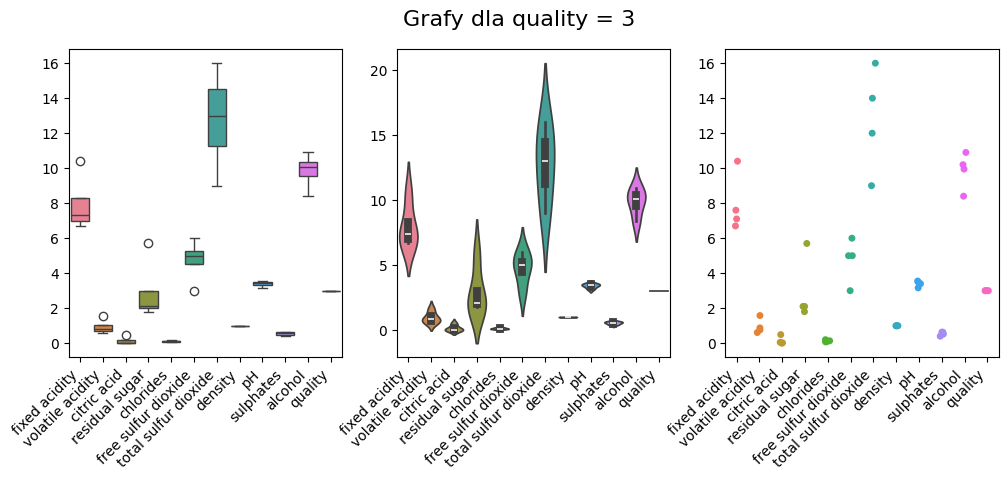

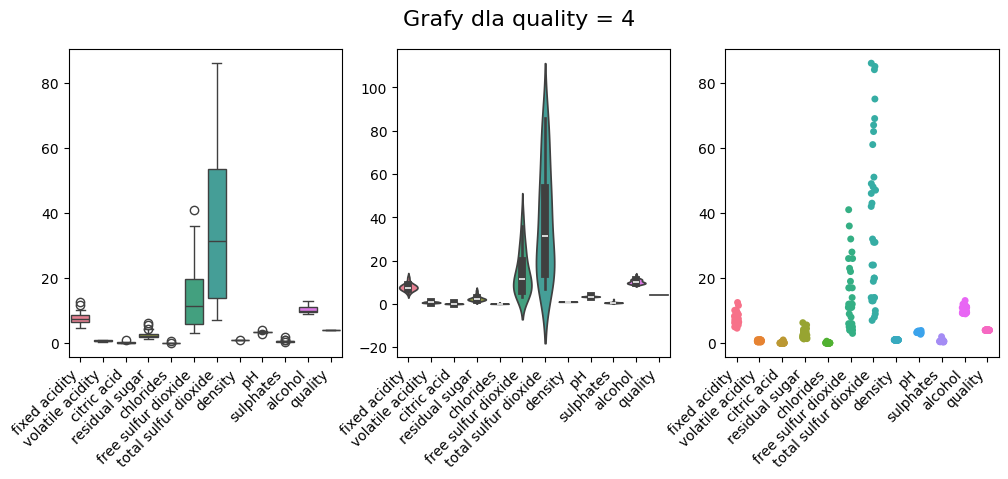

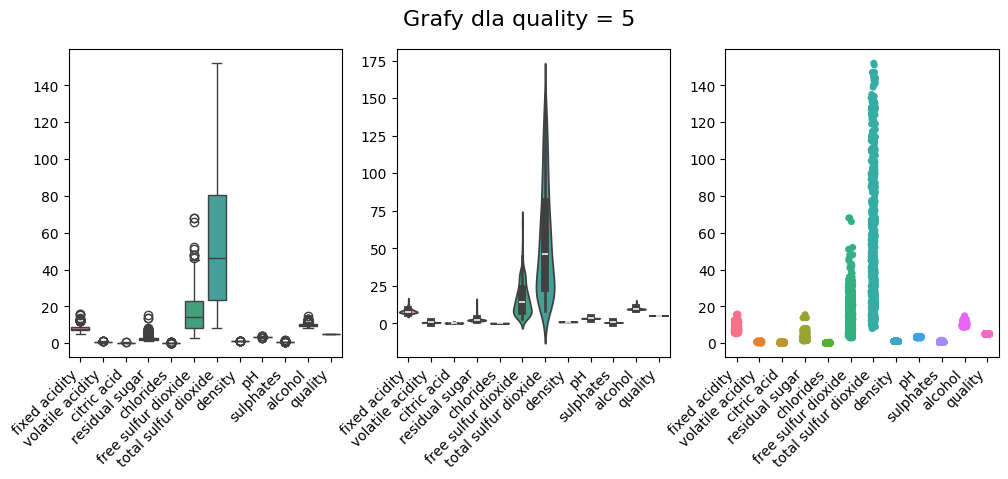

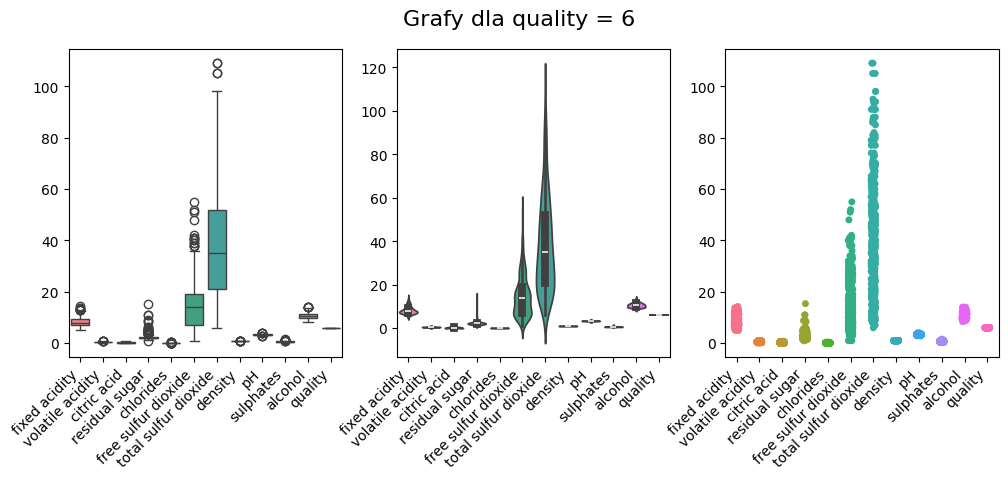

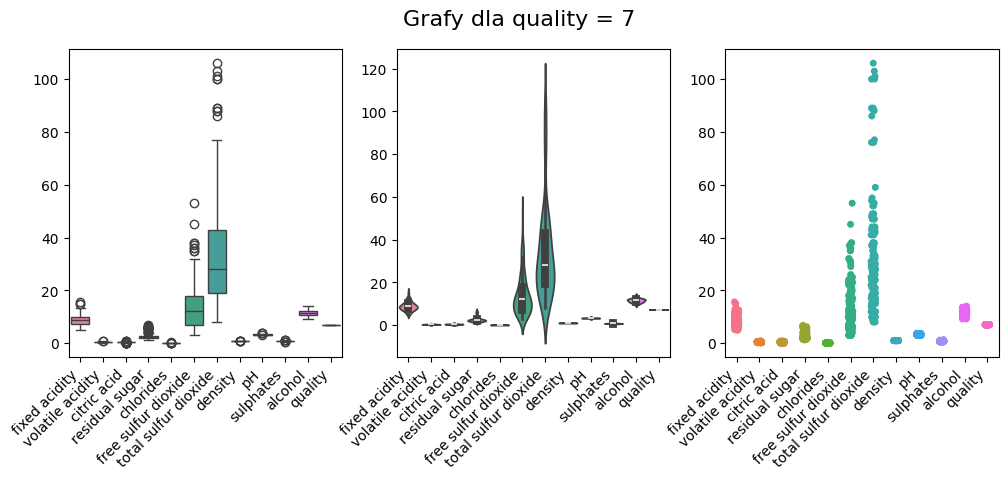

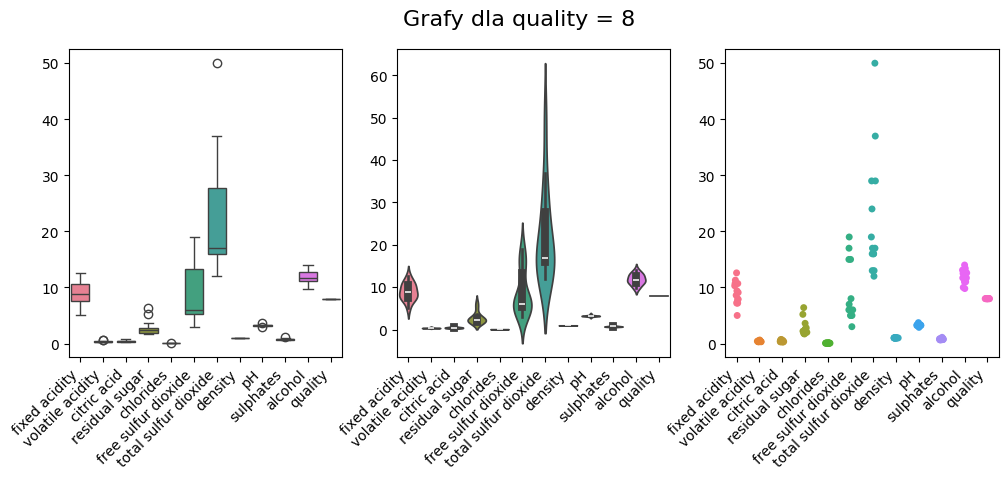

In [36]:
df = df[(df['quality'] != 3) | (df['total sulfur dioxide'] <= 40)]
df = df[(df['quality'] != 3) | (df['free sulfur dioxide'] <= 15)]

df = df[(df['quality'] != 4) | (df['total sulfur dioxide'] <= 100)]

df = df[(df['quality'] != 6) | (df['total sulfur dioxide'] <= 125)]

df = df[(df['quality'] != 7) | (df['total sulfur dioxide'] <= 250)]

df = df[(df['quality'] != 8) | (df['total sulfur dioxide'] <= 60)]
df = df[(df['quality'] != 8) | (df['free sulfur dioxide'] <= 30)]

for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Teraz wykresy prezentują się dokładniej

## Standardowe miary

In [7]:
opis = df.drop(columns = 'quality') # kolumna quality nie jest potrzebna przy obliczaniu miar
opis.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111  
std       0.156664     0.170399     1.082196  
min       2.740000     0.330000     8.400000  
25%       3.205000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

Różnice pomiędzy wartością minimalną i maksymalną:
* fixed acidity = 7,6
* volatile acidity = 1,05
* citric acid = 0,73
* residual sugar = 15,27
* chlorides = 0,52
* free sulfur dioxide = 52,38
* total sulfur dioxide = 243,1
* density = 0,01
* pH = 0,7
* sulphates = 1,34
* alcohol = 4,5

Kolumny free sulfur dioxide i total sulfur dioxide rozróżniają się danymi większymi o rzędy wielkości w porównaniu do reszty atrybutów. Z drugiej strony, atrybuty o najmniejszych wartościach to citric acid i chlorides.

Znaczące odchylenie standardowe (powyżej 1) jest obecne dla atrybutów:
* fixed acidity
* residual sugar
* free sulfur dioxide (10,25)
* total sulfur dioxide (32,78)
* alcohol

Atrybuty chlorides i density mają znikome odchylenie standardowe, czyli wartości powinny tworzyć skupiska. 

## Korelacja

In [8]:
#[kod]

In [9]:
def count_not_zero(list):
    '''
    function takes as parameter list and returns 
    number of elements with value higher than 0
    '''
    counter = 0
    for i in list:
        if i > 0:
            counter += 1
    return counter

def num_of_null(df):
    '''
    function takes as parameter DataFrame and returns two arrays:
    1 with the number of attributes missed in all objects
    2 with the number of attributes missed in every single object
    '''
    df = pd.isnull(df)
    missed_attr = [0] * len(df.count(0))
    missed_obj  = [0] * len(df.count(1))
    for i in range(len(df.count(0))):
        for j in range(len(df.count(1))):
            if df.iloc[j, i] == True:
                missed_attr[i] = missed_attr[i] + 1
                missed_obj[j] = missed_obj[j] + 1
    return missed_attr, missed_obj


missed_attr, missed_obj = num_of_null(df)

print(count_not_zero(missed_obj), "obiektów ma braki pośród danych")


0 obiektów ma braki pośród danych


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
190             7.9             0.350         0.46             3.6      0.078   
197            10.3             0.320         0.45             6.4      0.073   
271             5.6             0.850         0.05             1.4      0.045   
310            12.6             0.310         0.72             2.2      0.072   
321            11.3             0.620         0.67             5.2      0.086   
324            11.6             0.580         0.66             2.2      0.074   
340             9.4             0.300         0.56             2.8      0.080   
349            10.7             0.350         0.53             2.6      0.070   
352            10.7             0.350         0.53             2.6      0.070   
368            10.4             0.610         0.49             2.1      0.200   
419             5.0             0.420         0.24             2.0      0.060   
747             9.1         

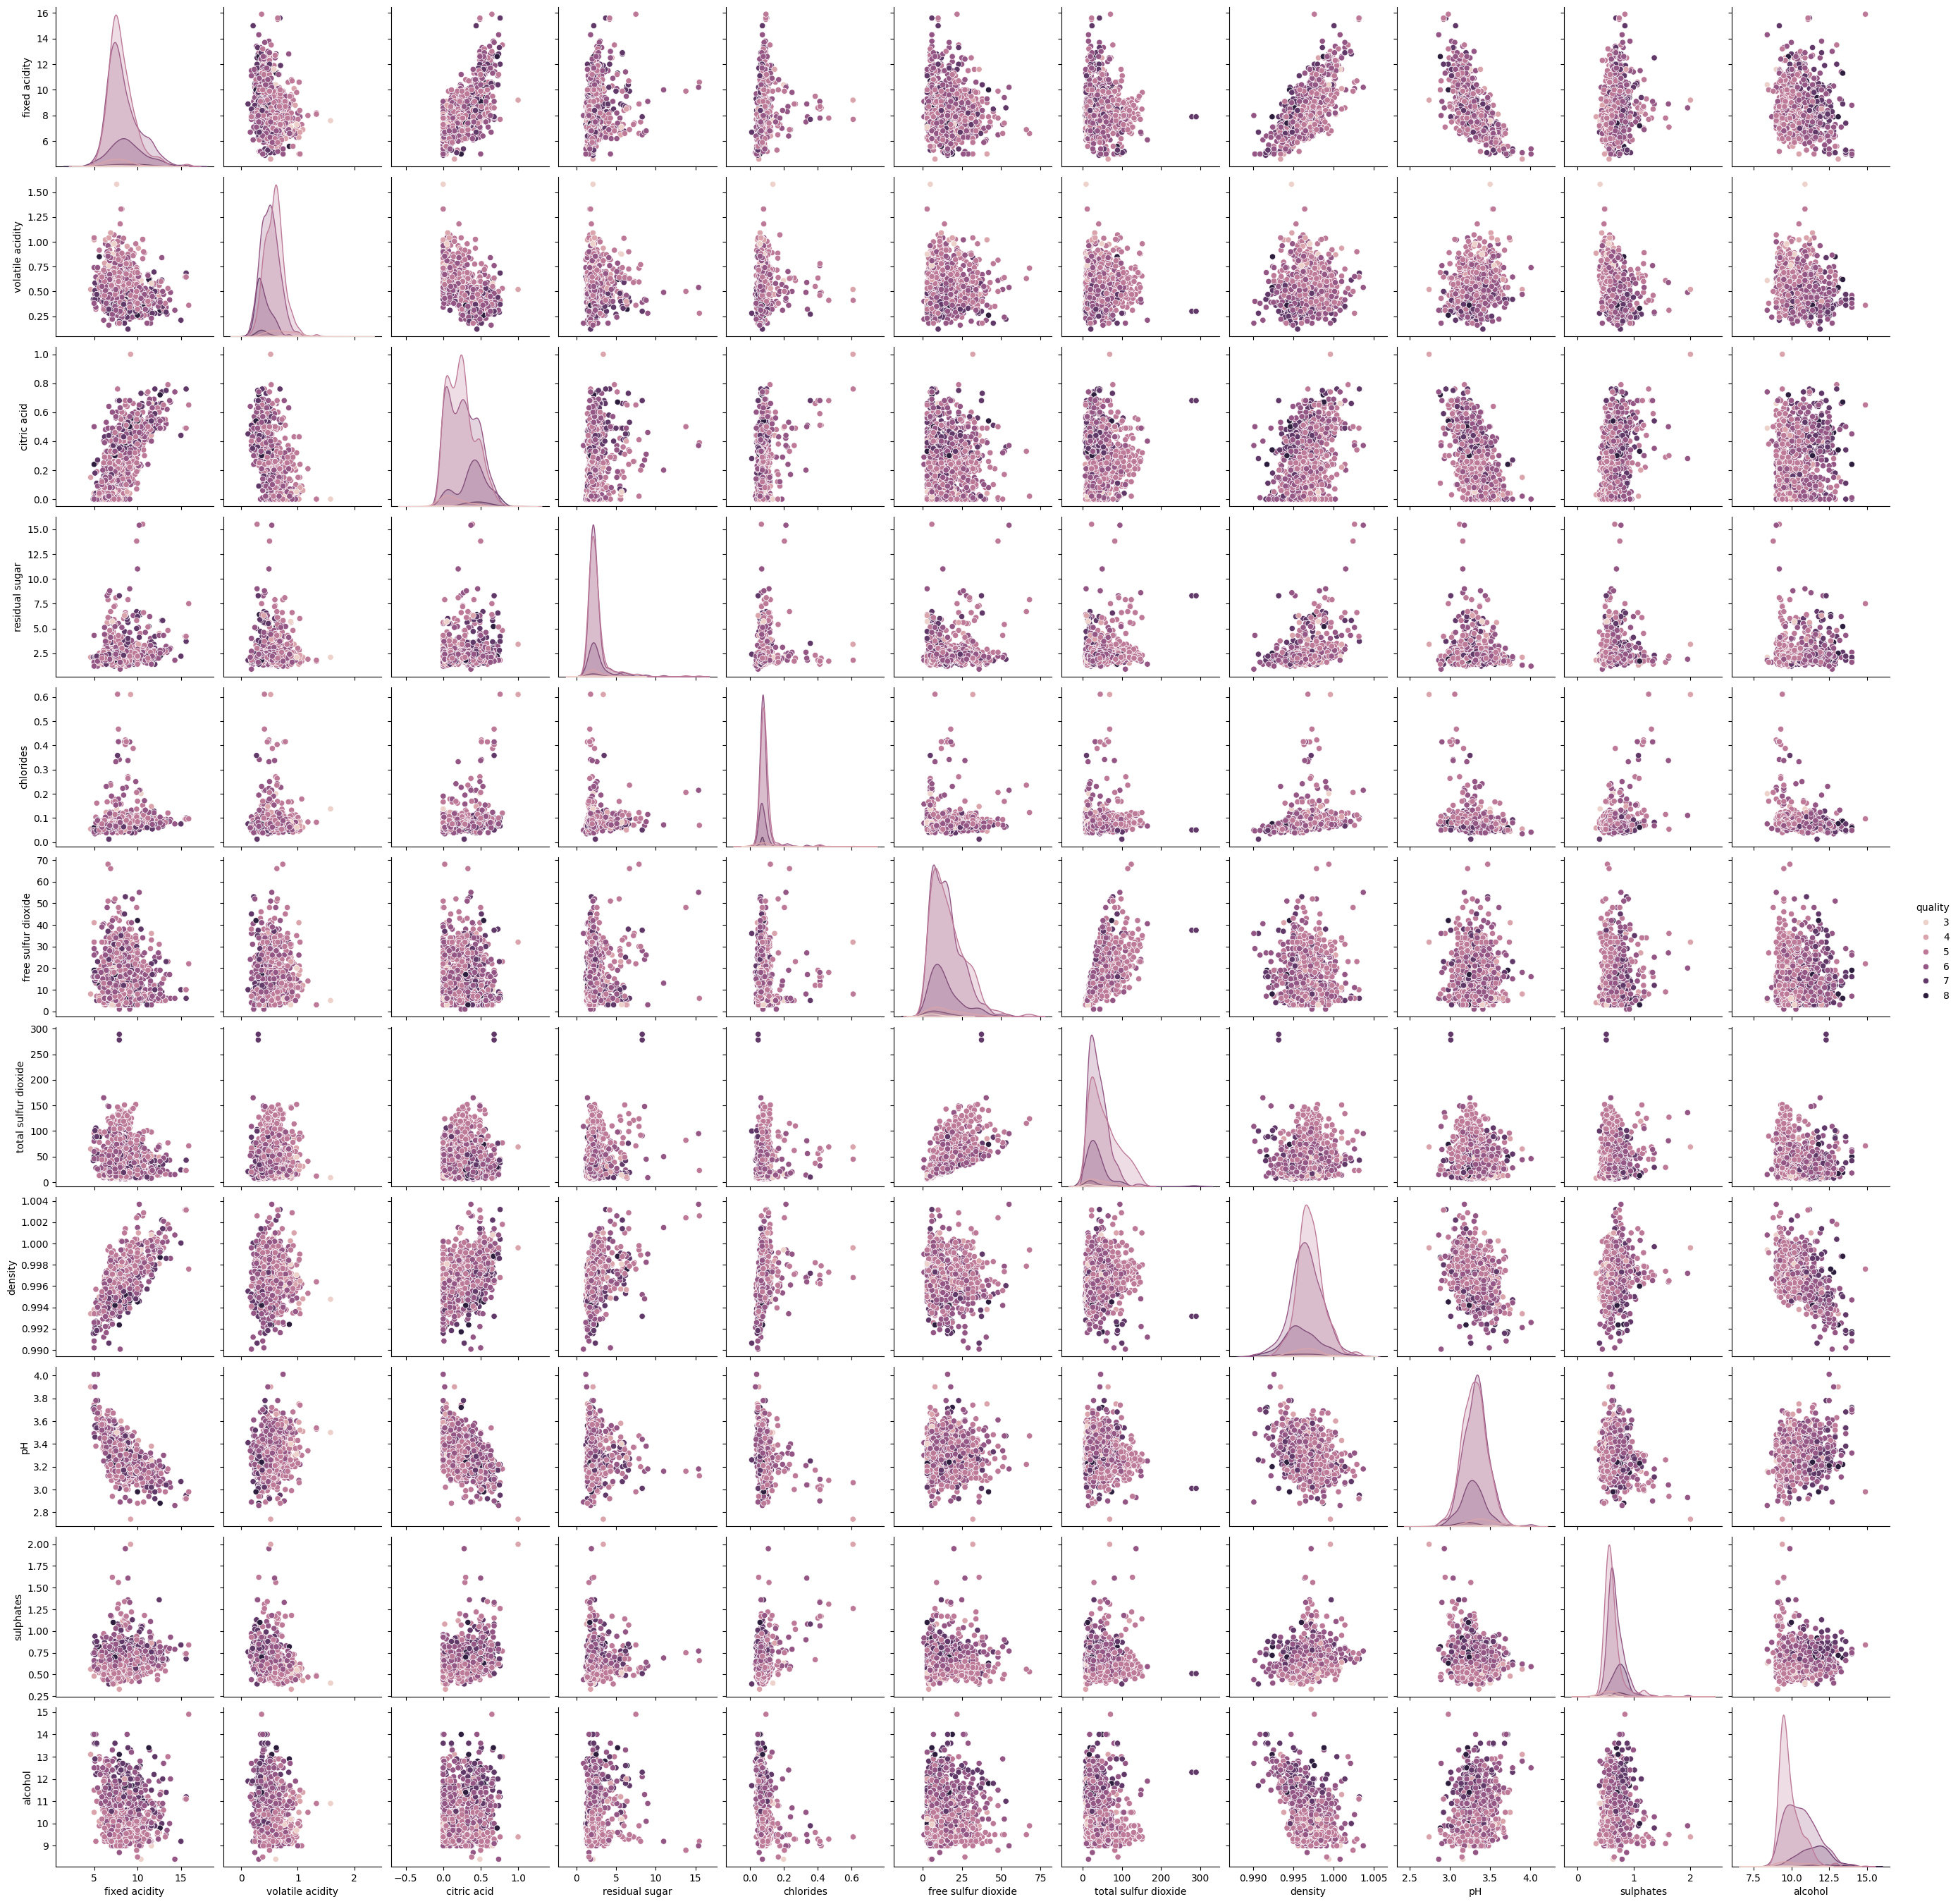

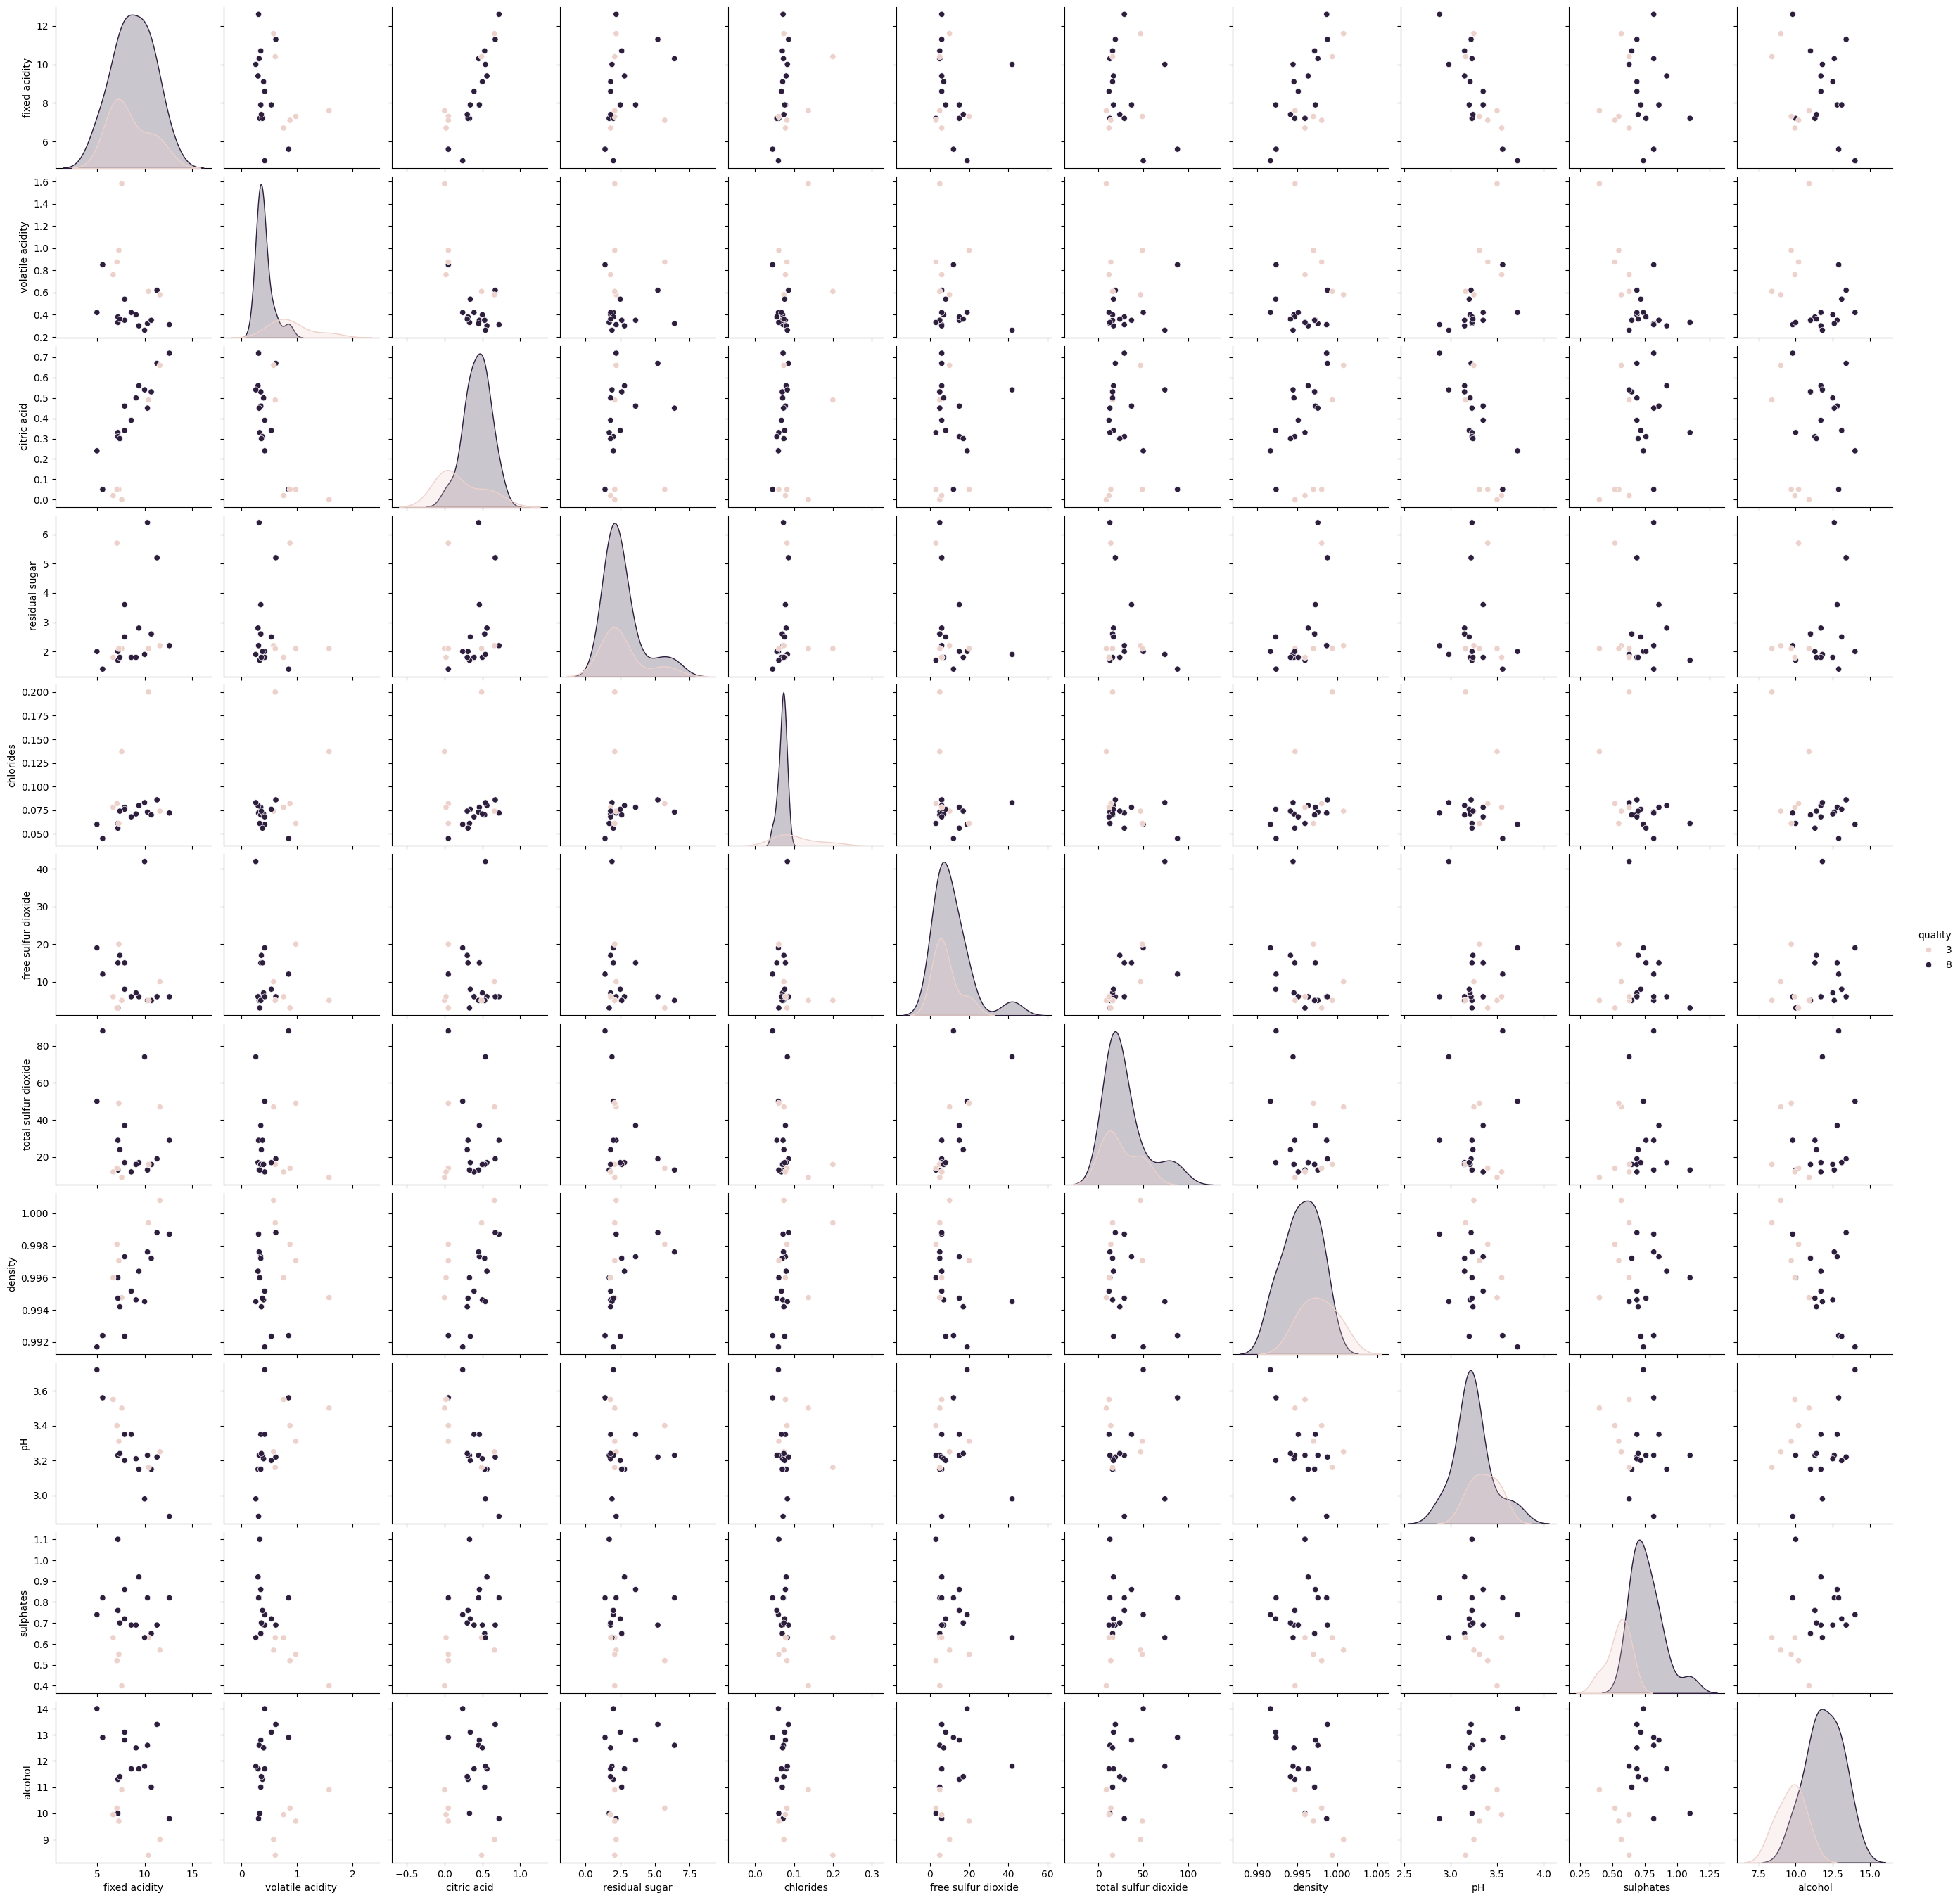

In [10]:
sns.pairplot(df.iloc[:, range(0, 12)], hue = 'quality')

tmp_df = df[(df.quality == 3) | (df.quality == 8)]

print(tmp_df)
sns.pairplot(tmp_df.iloc[:, range(0, 12)], hue = 'quality')

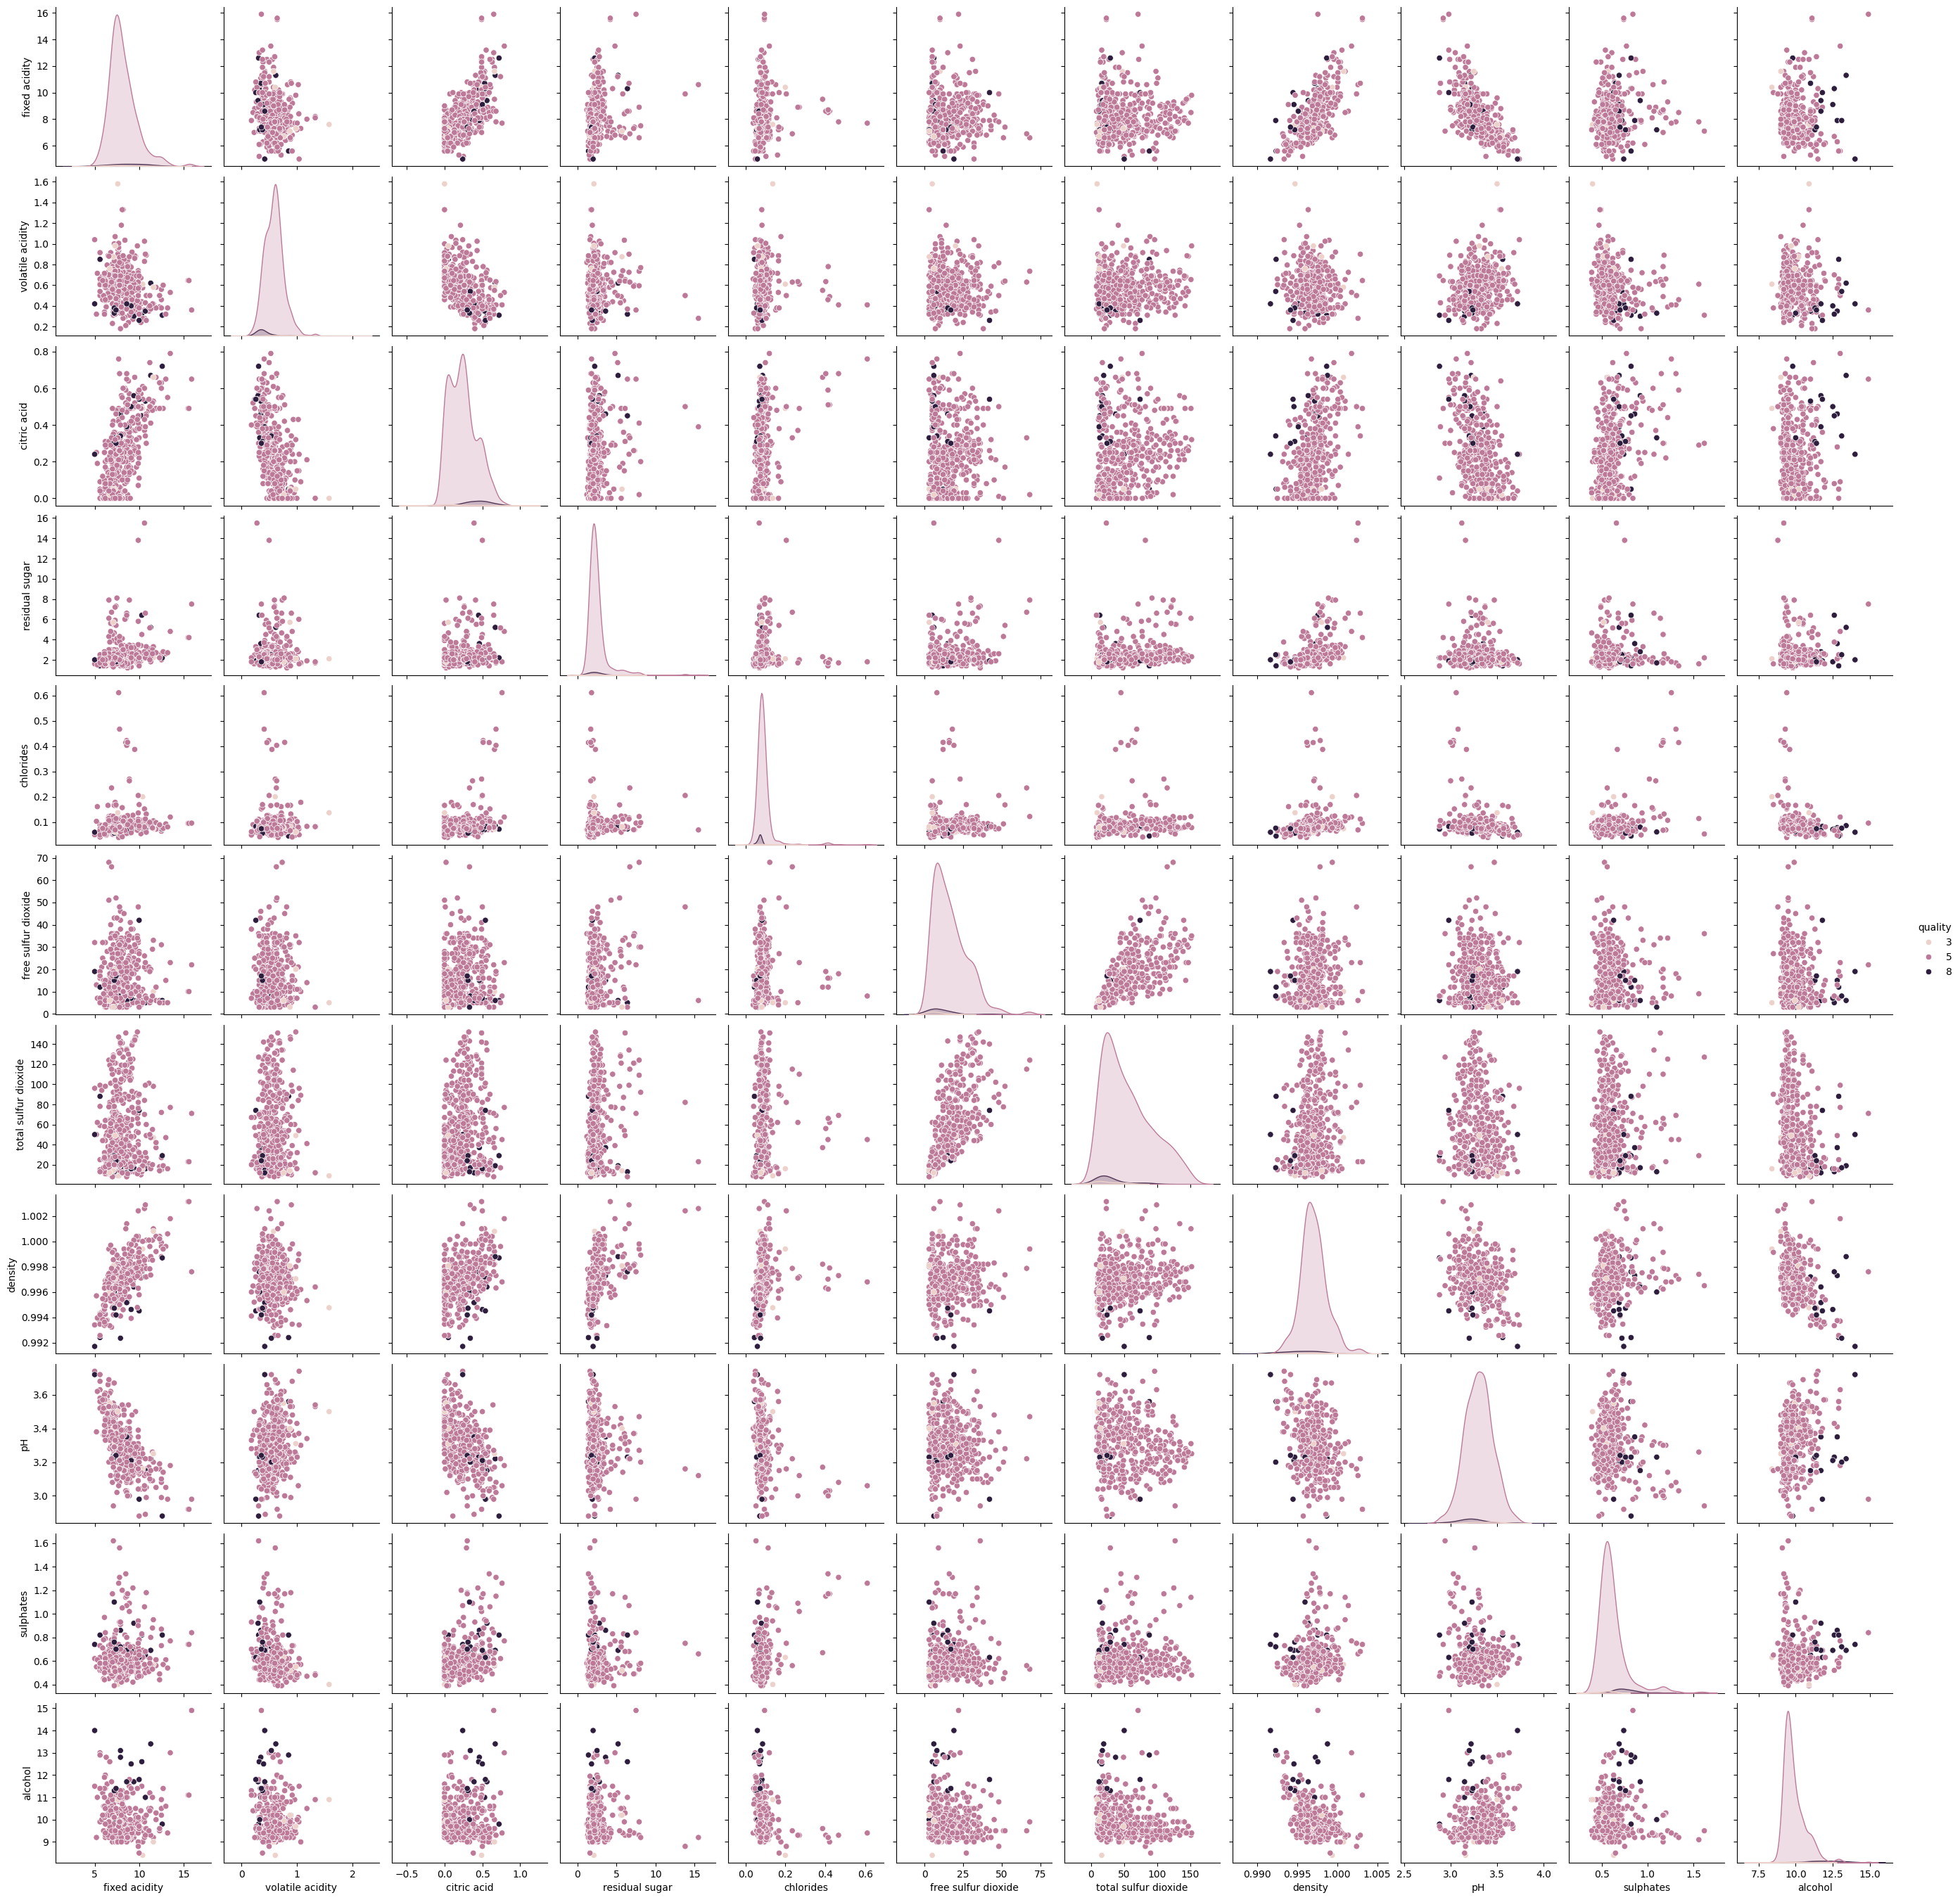

In [11]:
tmp_df = df[(df.quality == 3) | (df.quality == 5) | (df.quality == 8)]

sns.pairplot(tmp_df.iloc[:, range(0, 12)], hue = 'quality')

In [12]:
print(df[df['klasa'] == 0].describe())
print(df[df['klasa'] == 1].describe())
print(df[df['klasa'] == 2].describe())
print(df[df['klasa'] == 3].describe())

# zmienność poszczególnych atrybutów w całym zbiorze
plt.figure(figsize = (25,15))
plt.subplot(4,1,1)
sns.boxplot(data = df.iloc[:, 0:9])
plt.subplot(4,1,2)
sns.violinplot(data = df.iloc[:, 0:9])


# zmienność poszczególnych atrybutów w każdej klasie
plt.figure(figsize = (25, 15))

plt.subplot(4,2,1)
sns.boxplot(data = df[df['klasa'] == 0]).set_title("klasa 0")

plt.subplot(4,2,3)
sns.boxplot(data = df[df['klasa'] == 1]).set_title("klasa 1")

plt.subplot(4,2,5)
sns.boxplot(data = df[df['klasa'] == 2]).set_title("klasa 2")

plt.subplot(4,2,7)
sns.boxplot(data = df[df['klasa'] == 3]).set_title("klasa 3")

plt.subplot(4,2,2)
sns.violinplot(data = df[df['klasa'] == 0]).set_title("klasa 0")

plt.subplot(4,2,4)
sns.violinplot(data = df[df['klasa'] == 1]).set_title("klasa 1")

plt.subplot(4,2,6)
sns.violinplot(data = df[df['klasa'] == 2]).set_title("klasa 2")

plt.subplot(4,2,8)
sns.violinplot(data = df[df['klasa'] == 3]).set_title("3")

KeyError: 'klasa'